In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import csv
import os
import sys
import numpy as np
import collections
import scipy.io
import time
import cPickle as pickle

# CNN bits
import theano
import theano.tensor as T
import lasagne
from lasagne import layers

# for evaluation
sys.path.append(os.path.expanduser('~/projects/engaged_hackathon/'))
from engaged.features import evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# https://groups.google.com/forum/#!topic/lasagne-users/t_rMTLAtpZo
theano.config.profile = True
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

from sklearn import metrics
import sklearn.ensemble


Using gpu device 0: GeForce GTX 770 (CNMeM is disabled)


There are 10 classes 
[0 1 2 3 4 5 6 7 8 9]
train_X 6971
train_y 6971
val_y 888
val_X 888
test_y 873
test_X 873
0.58304696449
There are 10 classes 
[0 1 2 3 4 5 6 7 8 9]
train_X 6919
train_y 6919
val_y 925
val_X 925
test_y 888
test_X 888
0.493243243243
There are 10 classes 
[0 1 2 3 4 5 6 7 8 9]
train_X 6817
train_y 6817
val_y 990
val_X 990
test_y 925
test_X 925
0.458378378378
There are 10 classes 
[0 1 2 3 4 5 6 7 8 9]
train_X 6806
train_y 6806
val_y 936
val_X 936
test_y 990
test_X 990
0.566666666667
There are 10 classes 
[0 1 2 3 4 5 6 7 8 9]
train_X 6973
train_y 6973
val_y 823
val_X 823
test_y 936
test_X 936
0.577991452991
There are 10 classes 
[0 1 2 3 4 5 6 7 8 9]
train_X 7071
train_y 7071
val_y 838
val_X 838
test_y 823
test_X 823
0.551640340219
There are 10 classes 
[0 1 2 3 4 5 6 7 8 9]
train_X 7088
train_y 7088
val_y 806
val_X 806
test_y 838
test_X 838
0.542959427208
There are 10 classes 
[0 1 2 3 4 5 6 7 8 9]
train_X 7110
train_y 7110
val_y 816
val_X 816
test_y 806
test_X 806


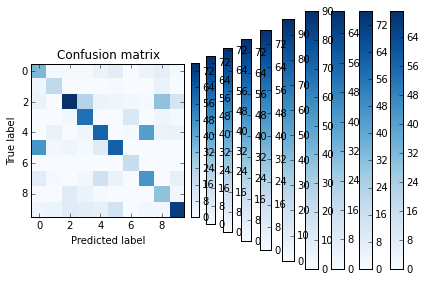

In [59]:
accs = []

for split in range(1, 11):
    # load in the data
    base_path = '/media/michael/Seagate/urban8k/'

    loadpath = base_path + 'splits_128/split' + str(split) + '.pkl'
    dataset = pickle.load(open(loadpath))

    num_classes = np.unique(dataset['train_y']).shape[0]
    dataset['train_y'] = dataset['train_y'].ravel().astype(np.int32)
    dataset['test_y'] = dataset['test_y'].ravel().astype(np.int32)
    dataset['val_y'] = dataset['val_y'].ravel().astype(np.int32)

    # creating the train set
    row_means = collections.defaultdict(list)

    for data_type in ['train_', 'test_', 'val_']:
        for spec in dataset[data_type + 'X']:
            row_med = np.median(spec, axis=1)
            row_var = np.var(spec, axis=1)
            row_mean = np.mean(spec, axis=1)
            row_max = np.max(spec, axis=1)
            row_min = np.min(spec, axis=1)
            to_add = np.hstack((row_mean, row_var, row_med, row_max, row_min))
            row_means[data_type + 'X'].append(to_add)

        row_means[data_type + 'X'] = np.vstack(row_means[data_type + 'X'])

        row_means[data_type + 'y'] = np.hstack(dataset[data_type + 'y'])
        
    row_means['train_X'] = np.vstack((row_means['train_X'], row_means['val_X']))
    row_means['train_y'] = np.hstack((row_means['train_y'], row_means['val_y']))


    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, n_jobs=4)
    rf.fit(row_means['train_X'], row_means['train_y'])

    pred_y = rf.predict(row_means['test_X'])
    gt = row_means['test_y']

    print metrics.accuracy_score(pred_y, gt)
    accs.append(metrics.accuracy_score(pred_y, gt))

#     cm = metrics.confusion_matrix(pred_y, gt)

#     def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
#         plt.imshow(cm, interpolation='nearest', cmap=cmap)
#         plt.title(title)
#         plt.colorbar(fraction=0.046, pad=0.04)
#         plt.tight_layout()
#         plt.ylabel('True label')
#         plt.xlabel('Predicted label')

#     plot_confusion_matrix(cm)

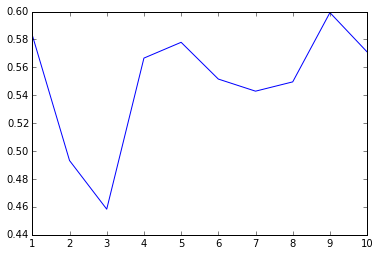

In [60]:
plt.plot(range(1, 11), accs);

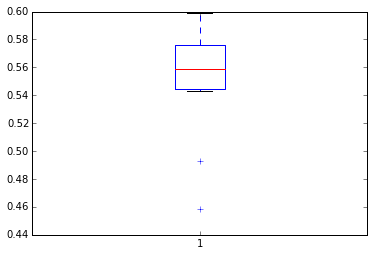

In [61]:
plt.boxplot(accs);

In [64]:
print np.median(accs)
np.argmin(np.abs(np.array(accs) - np.median(accs)))

0.559153503443


3

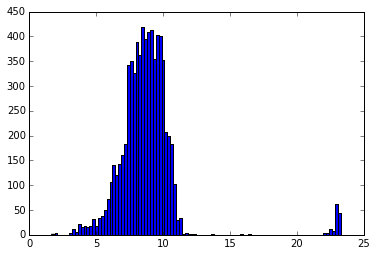

In [76]:
x_sum = [xx.mean() for xx in dataset['train_X']]
plt.hist(x_sum, 100);

In [90]:
x = 'sds'
if x is True:
    print "True"
else:
    print "Not true"

Not true
